In [8]:
%cd /home/smalani/Cybernetic

from growth import parFun as growth_parFun
from growth import odeFun as growth_odeFun
import numpy as np

/home/smalani/Cybernetic


In [9]:
from scipy.integrate import solve_ivp

out = []
out_t = []

# X, G, E, O, e1, e2, e3, C
# initial = 1, 0, 3.5, 7.5, 0.4, 0.4, 0.4, 0
initial = 0.1, 9, 0, 7.5, 0.5, 0.5, 0.5, 0
tspan = [0, 25]

# fac = 1.3
pars = growth_parFun(alpha_mult=[1,1,1], beta_mult=[1,1,1], mu1_max=0.45, mu2_max=0.2, mu3_max=0.33)

# pars = growth_parFun(alpha=1.0, beta=0.2, alpha_mult = [1., 1., 1.], beta_mult = [1., 1., 1.],
#          mu1_max=0.44, mu2_max=0.32, mu3_max=0.31, Y1=0.16, Y2=0.74, Y3=0.50, K1=0.1, K2=0.02, K3=0.001,
#          phi1=0.27, phi2=1.067, phi3=2.087, phi4=0.95, kLa=1200.0, KO2=0.0001, KO3=0.0001, gamma1=6.0, gamma2=6.0,
#          gamma3=0.3, alpha_star=0.1, O_star=7.5)

D = 0
G0 = 28


# initial = sol.y[:,-1]

sol = solve_ivp(growth_odeFun, tspan, initial, args=(pars,D,G0), 
                    rtol=1e-12, atol=1e-15, 
                    method='BDF'
                )

out.append(sol.y)
out_t.append(sol.t)


out = np.concatenate(out,axis=1)
out_t = np.concatenate(out_t)

print(out.shape)
print(out_t.shape)

(8, 709)
(709,)


(8, 709)


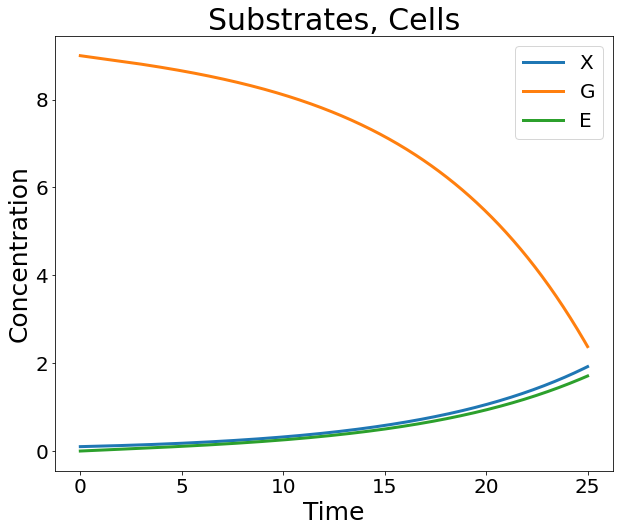

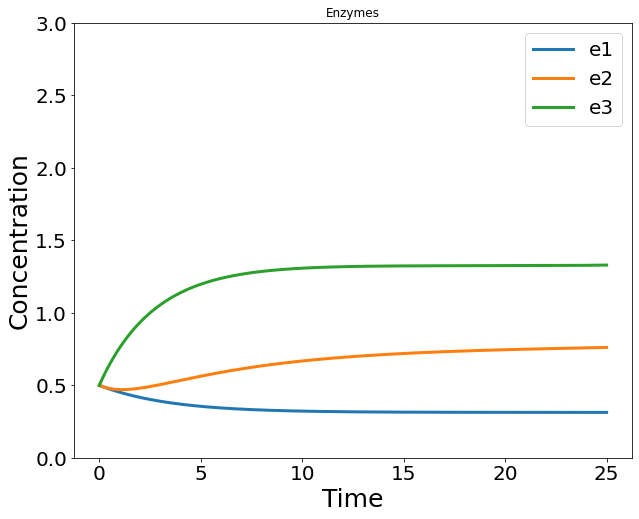

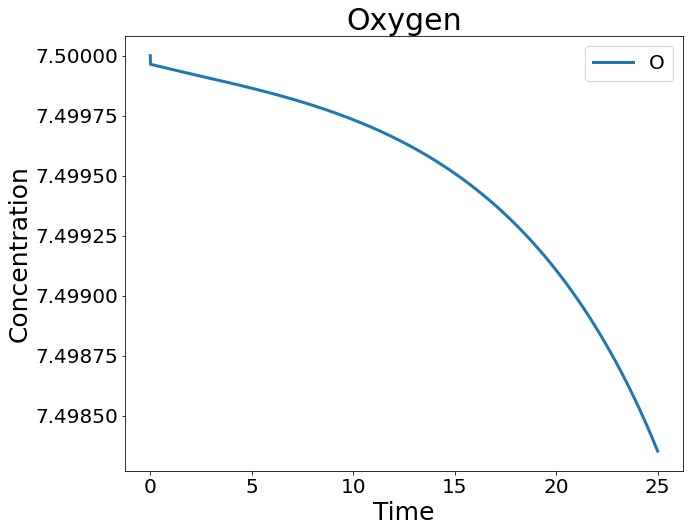

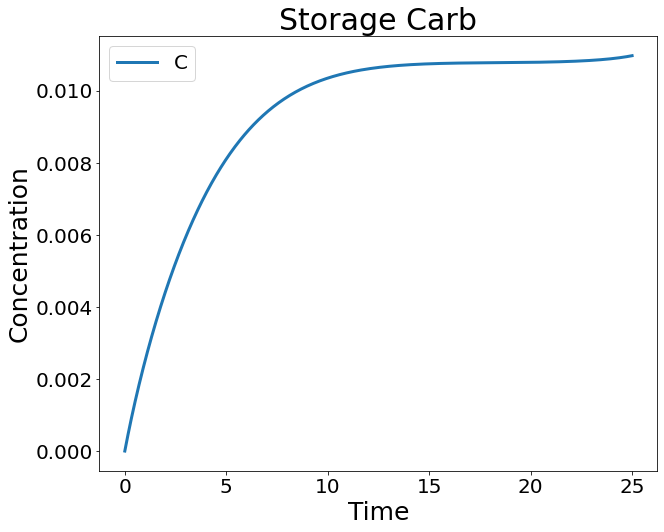

In [10]:
import matplotlib.pyplot as plt

print(sol.y.shape)
X, G, E, O, e1, e2, e3, C = out
t = out_t

len = 200000

plt.figure(figsize=(10,8))
plt.plot(t, X, label='X', linewidth=3)
plt.plot(t[:len], G[:len], label='G', linewidth=3)
plt.plot(t, E, label='E', linewidth=3)
plt.xlabel('Time', fontsize=25)
plt.ylabel('Concentration', fontsize=25)
plt.title('Substrates, Cells', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

plt.figure(figsize=(10,8))
plt.plot(t, e1, label='e1', linewidth=3)
plt.plot(t, e2, label='e2', linewidth=3)
plt.plot(t, e3, label='e3', linewidth=3)
plt.xlabel('Time', fontsize=25)
plt.ylabel('Concentration', fontsize=25)
plt.title('Enzymes')
plt.ylim(0,3)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

plt.figure(figsize=(10,8))
plt.plot(t, O, label='O', linewidth=3)
plt.xlabel('Time', fontsize=25)
plt.ylabel('Concentration', fontsize=25)
plt.title('Oxygen', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

plt.figure(figsize=(10,8))
plt.plot(t, C, label='C', linewidth=3)
plt.xlabel('Time', fontsize=25)
plt.ylabel('Concentration', fontsize=25)
plt.title('Storage Carb', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)



(8, 1768)
The solution converged.
[-9.63042547e-19  2.80000000e+01 -2.83885925e-18  7.50000000e+00
  2.99159830e-01  2.99159830e-01  1.42103317e+00  1.34562974e-02]
[9.72331176e-10 2.80000000e+01 9.80586466e-10 7.50000000e+00
 2.99159833e-01 2.99159833e-01 1.42103317e+00 1.34562972e-02]


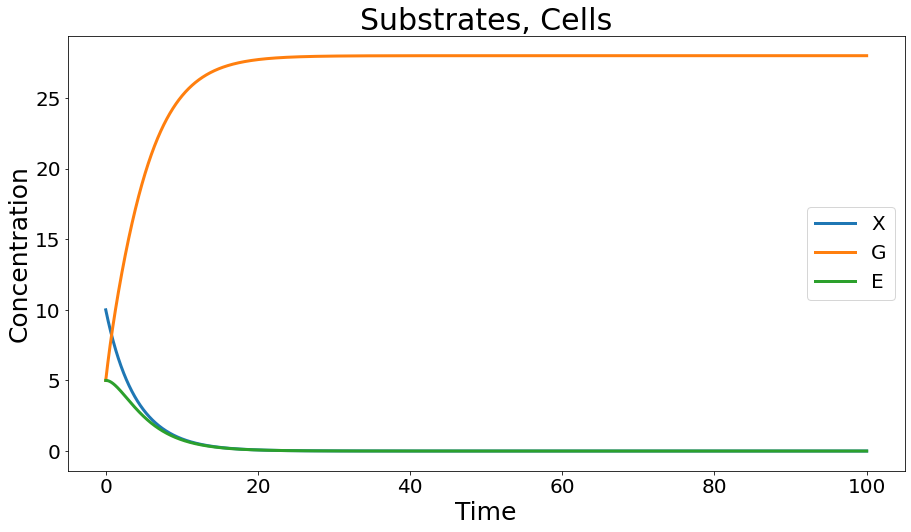

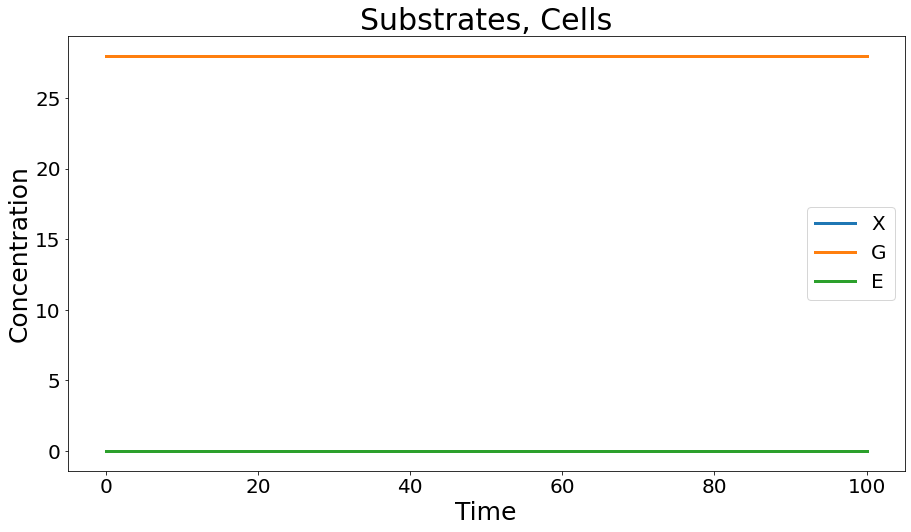

In [11]:
from scipy.optimize import root

initial = np.array([10, 5, 5, 7.5, 0.5, 0.5, 0.5, 0.5])
tspan = [0, 100]

# fac = 1.45

# pars = growth_parFun(alpha=1.0, beta=0.2, alpha_mult = [1., 1., 1.], beta_mult = [1., 1., 1.],
#          mu1_max=0.44, mu2_max=0.32, mu3_max=0.31, Y1=0.16, Y2=0.74, Y3=0.50, K1=0.1, K2=0.02, K3=0.001,
#          phi1=0.27, phi2=1.067, phi3=2.087, phi4=0.95, kLa=1200.0, KO2=0.0001, KO3=0.0001, gamma1=6.0, gamma2=6.0,
#          gamma3=0.3, alpha_star=0.1, O_star=7.5)

# pars = growth_parFun(alpha_mult=[1,1,1], beta_mult=[1,1,1], mu1_max=0.45, mu2_max=0.2, mu3_max=0.33)
D = 0.36
# G0 = 20

sol = solve_ivp(growth_odeFun, tspan, initial, args=(pars,D,G0), 
                    rtol=1e-12, atol=1e-15, 
                    method='BDF'
                )

X, G, E, O, e1, e2, e3, C = sol.y

plt.figure(figsize=(15,8))
plt.plot(sol.t, X, label='X', linewidth=3)
plt.plot(sol.t, G, label='G', linewidth=3)
plt.plot(sol.t, E, label='E', linewidth=3)
plt.xlabel('Time', fontsize=25)
plt.ylabel('Concentration', fontsize=25)
plt.title('Substrates, Cells', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

fsolve_fun = lambda x: growth_odeFun(0, x, pars, D, G0)

print(sol.y.shape)
initial = sol.y[:,-1]

sol = root(fsolve_fun, initial)
print(sol.message)
print(sol.x)
print(initial)

sol = solve_ivp(growth_odeFun, tspan, sol.x, args=(pars,D,G0), 
                    rtol=1e-12, atol=1e-15, 
                    method='BDF'
                )

X, G, E, O, e1, e2, e3, C = sol.y

plt.figure(figsize=(15,8))
plt.plot(sol.t, X, label='X', linewidth=3)
plt.plot(sol.t, G, label='G', linewidth=3)
plt.plot(sol.t, E, label='E', linewidth=3)
plt.xlabel('Time', fontsize=25)
plt.ylabel('Concentration', fontsize=25)
plt.title('Substrates, Cells', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

In [12]:
D_arr = np.linspace(0.1,0.5,1000)
ss_vals = np.zeros((8,D_arr.size))

initial = np.array([10, 5, 5, 7.5, 0.5, 0.5, 0.5, 0.5])

# fac = 1.45

for i in range(D_arr.size):
    tspan = [0, 100]                                                    
    # pars = growth_parFun(alpha_mult=[1,1,1], beta_mult=[1,1,1], mu1_max=0.45*fac, mu2_max=0.2*fac, mu3_max=0.33*fac)
    D = D_arr[i]
    # G0 = 28

    sol = solve_ivp(growth_odeFun, tspan, initial, args=(pars,D,G0), 
                        rtol=1e-12, atol=1e-15, 
                        method='BDF'
                    )

    initial = sol.y[:,-1]
    initial[0] = 10

    sol = root(fsolve_fun, initial)
    ss_vals[:,i] = sol.x
    initial = sol.x

/tmp/ipykernel_12230/3297363950.py:18: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(D_arr, X/(G0-G), label='X', linewidth=3)


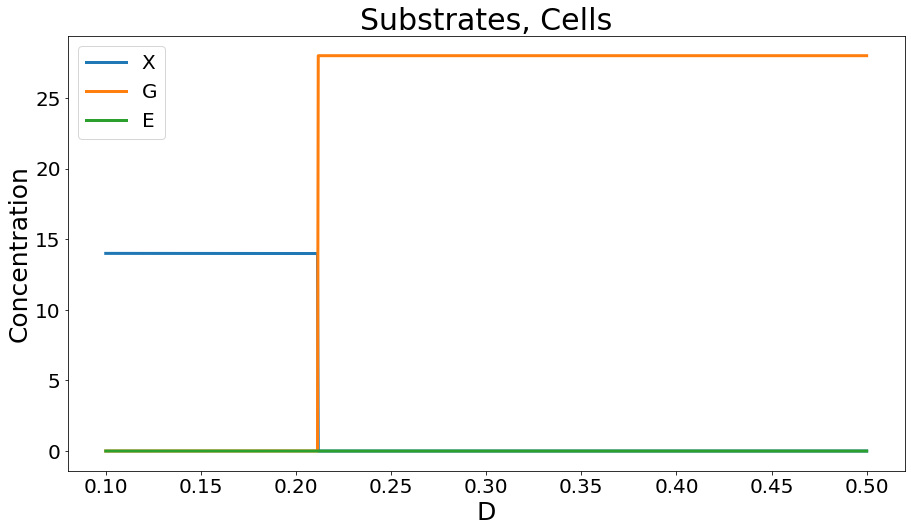

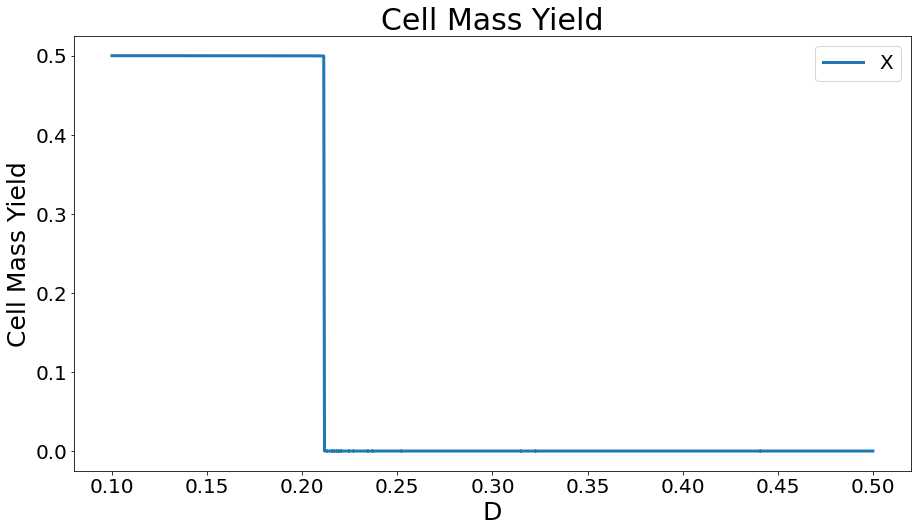

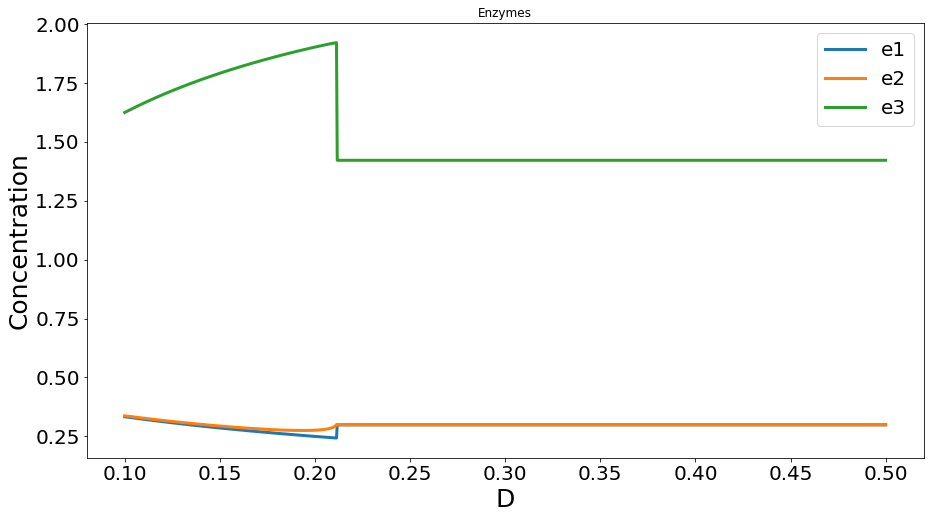

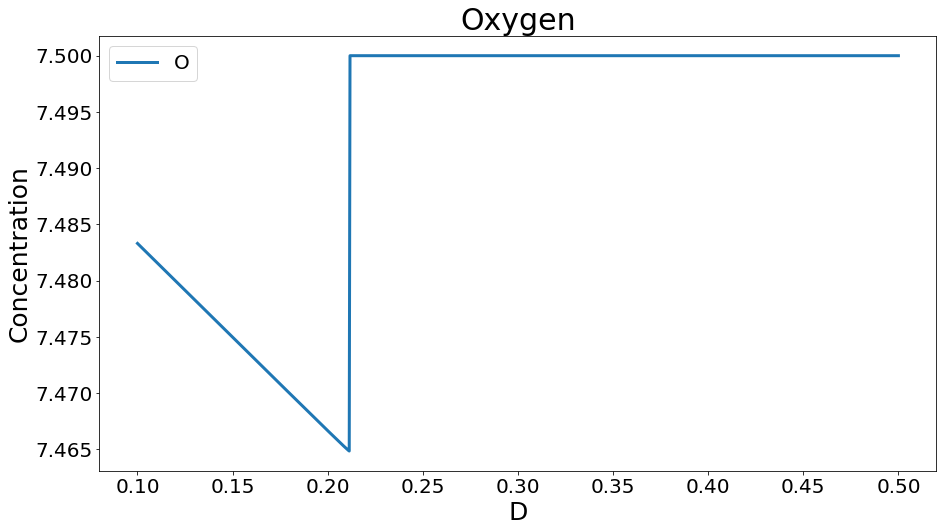

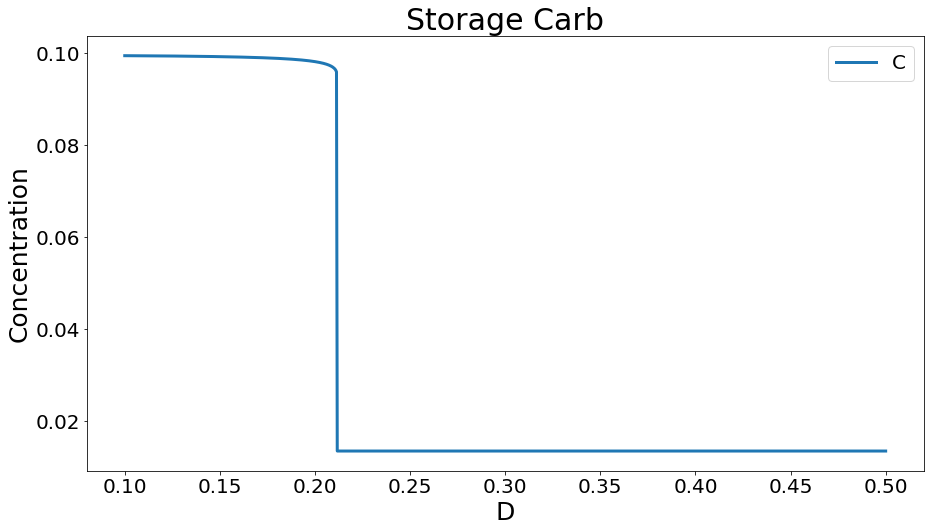

In [14]:
import matplotlib.pyplot as plt

X, G, E, O, e1, e2, e3, C = ss_vals
X[X<1e-5] = 0

plt.figure(figsize=(15,8))
plt.plot(D_arr, X, label='X', linewidth=3)
plt.plot(D_arr, G, label='G', linewidth=3)
plt.plot(D_arr, E, label='E', linewidth=3)
plt.xlabel('D', fontsize=25)
plt.ylabel('Concentration', fontsize=25)
plt.title('Substrates, Cells', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

plt.figure(figsize=(15,8))
plt.plot(D_arr, X/(G0-G), label='X', linewidth=3)
plt.xlabel('D', fontsize=25)
plt.ylabel('Cell Mass Yield', fontsize=25)
plt.title('Cell Mass Yield', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

plt.figure(figsize=(15,8))
plt.plot(D_arr, e1, label='e1', linewidth=3)
plt.plot(D_arr, e2, label='e2', linewidth=3)
plt.plot(D_arr, e3, label='e3', linewidth=3)
plt.xlabel('D', fontsize=25)
plt.ylabel('Concentration', fontsize=25)
plt.title('Enzymes')
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

plt.figure(figsize=(15,8))
plt.plot(D_arr, O, label='O', linewidth=3)
plt.xlabel('D', fontsize=25)
plt.ylabel('Concentration', fontsize=25)
plt.title('Oxygen', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

plt.figure(figsize=(15,8))
plt.plot(D_arr, C, label='C', linewidth=3)
plt.xlabel('D', fontsize=25)
plt.ylabel('Concentration', fontsize=25)
plt.title('Storage Carb', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

